# Project 5: Advertisement Budget Using Linear Regression

The objective of this project is to analyze the impact of advertising budgets across different media channels (TV, Radio, and Newspaper) on product sales, and to build a Linear Regression model that predicts sales based on these budgets.

The aim is to identify which advertising mediums contribute most effectively to sales growth and provide actionable insights for future marketing strategies.


### Import neccasary libriaies

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset and see first five rows

In [8]:
df = pd.read_csv('Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Shape of the data

In [9]:
df.shape

(200, 5)

### Datatype and Null value check

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### analyze the Data

In [11]:
pd.set_option('display.float', '{:.2f}'.format)
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.97,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


### Rename the column for better usability

In [12]:
df.rename(columns={'TV Ad Budget ($)':'TV', 'Radio Ad Budget ($)':'Radio', 'Newspaper Ad Budget ($)':'Newspaper', 'Sales ($)':'Sales'}, inplace=True)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.10,37.80,69.20,22.10
1,2,44.50,39.30,45.10,10.40
2,3,17.20,45.90,69.30,9.30
3,4,151.50,41.30,58.50,18.50
4,5,180.80,10.80,58.40,12.90


### Drop the unneccasary column

In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


### Line plot between different different advertisement budgets and sales.

TV vs Sales: Shows a strong positive linear trend, indicating TV advertising has a high impact on sales.

Radio vs Sales: Also shows a good positive correlation, though with more variation.

Newspaper vs Sales: Appears almost flat or noisy – little to no impact seen.

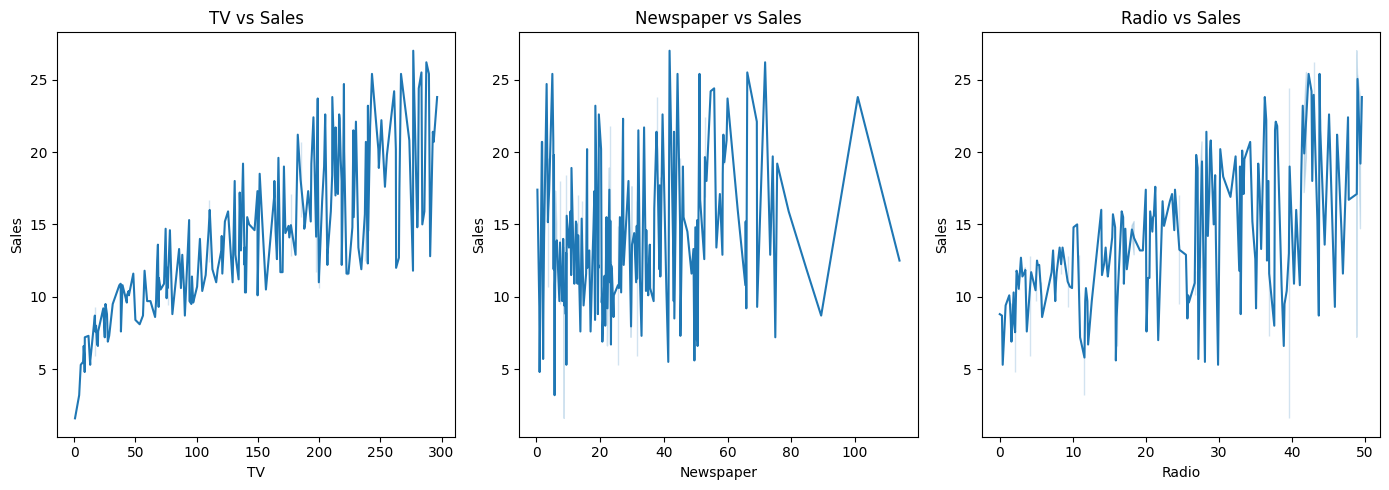

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.lineplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.lineplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.subplot(1, 3, 3)
sns.lineplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

plt.tight_layout()
plt.show()


### Plot Heatmap for correlation between data

Correlation values reinforce the graph findings:

TV: ~0.78 correlation with Sales

Radio: ~0.58

Newspaper: ~0.23 (very low)

<Axes: >

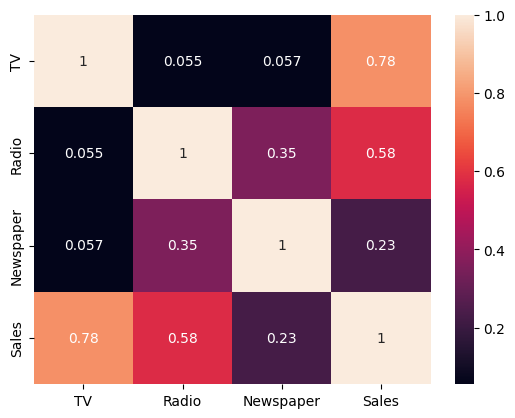

In [22]:
sns.heatmap(df.corr(), annot=True)

### Range and outlier Detaction

Outliers were present in Newspaper and Sales columns.

<Axes: >

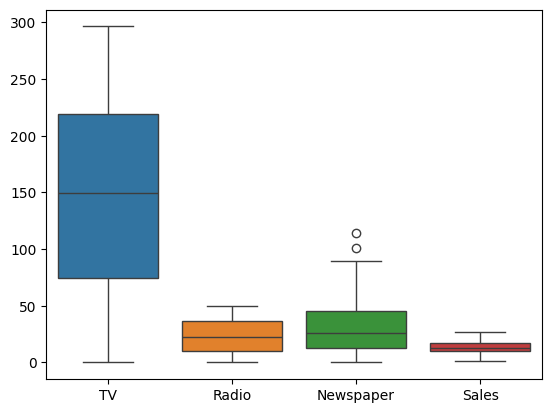

In [23]:
sns.boxplot(data = df)

### If data contains outliers remove them and check shape of data

In [24]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

df_out = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
df_out.shape

(198, 4)

### Boxplot after Removing outliers

<Axes: >

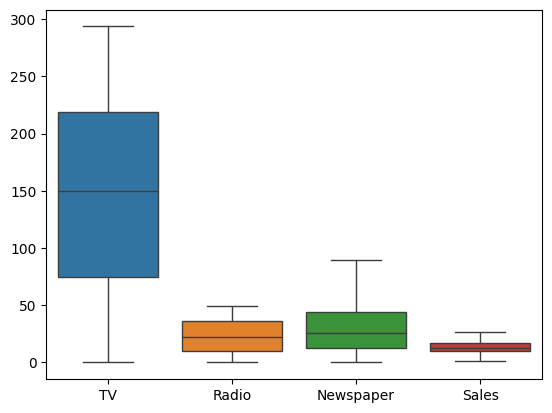

In [25]:
sns.boxplot(data = df_out)

### Importing neccesary libraries and applies standard scaler on data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [27]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,TV,Radio,Newspaper,Sales
0,0.97,0.98,1.78,1.55
1,-1.20,1.08,0.67,-0.70
2,-1.52,1.53,1.78,-0.91
3,0.05,1.22,1.29,0.86
4,0.39,-0.84,1.28,-0.22


### Test Train split on data
sales column goes to our testing set and other columns go to our training set

we split out data into 80 - 20 out 80% data will go in training set and 20% in testing set.

we set random_state as 42 for consistant input every time

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled.drop('Sales', axis=1), df_scaled['Sales'], test_size=0.2, random_state=42)

### we fit our linear regression model in our dataset

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### we cheacked accuracy of our data

In [30]:
acc = lr.score(x_test, y_test)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 89.94%


### Model Coefficients Analysis

In [50]:
coefficients = pd.DataFrame(lr.coef_, index=x_train.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV                0.74
Radio             0.54
Newspaper         0.01


### Checking errors

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr.predict(x_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

MAE: 0.28
MSE: 0.12
R² Score: 0.90


### Residual plot to validate assumptions of linear regression.

<Axes: xlabel='Sales', ylabel='Count'>

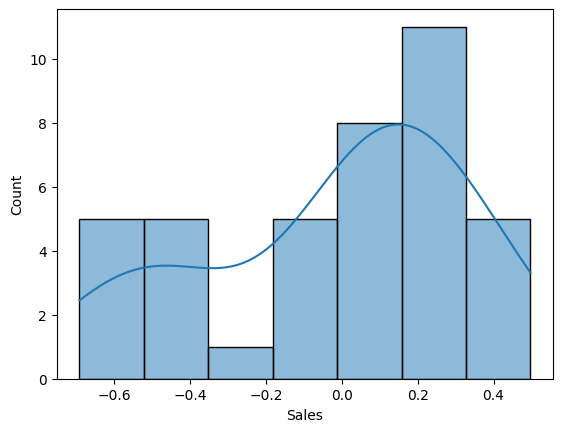

In [32]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)

### Ploting the regression line on data

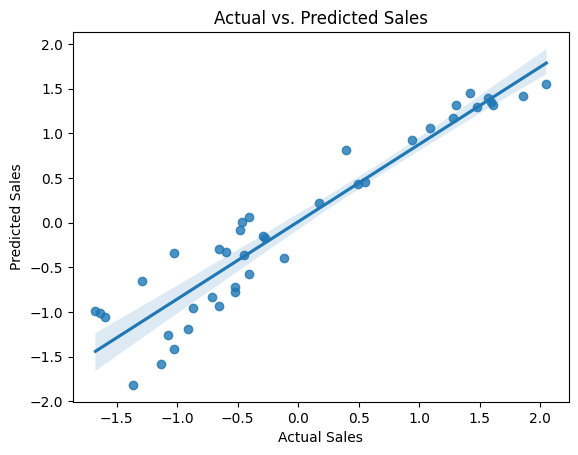

In [33]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### Cross validation score

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, df_scaled.drop('Sales', axis=1), df_scaled['Sales'], cv=5)
print(f'Cross-validation scores: {cv_scores}')

Cross-validation scores: [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]


# Data without outliers

In [35]:
x_out = df_out.drop('Sales', axis=1)
y_out = df_out['Sales']

### Test- Train split without outliers

In [36]:
x_test, x_train_out, y_test, y_train_out = train_test_split(x_out, y_out, test_size=0.2, random_state=42)

### Fit linear regression model

In [37]:
lr_out = LinearRegression()
lr_out.fit(x_train_out, y_train_out)

LinearRegression()

### Checking accuracy score for the data

In [43]:
acc_out = lr_out.score(x_test, y_test)
print(f'Accuracy: {acc_out*100:.2f}%')

Accuracy: 87.82%


### Model Coefficients Analysis without outliers

After removing outliers, coefficient values changed drastically, especially for TV.

In [52]:
coefficients_out = pd.DataFrame(lr_out.coef_, index=x_train_out.columns, columns=['Coefficient'])
print(coefficients_out)

           Coefficient
TV                0.05
Radio             0.21
Newspaper        -0.03


### Checking errors without outliers

In [44]:
y_pred = lr.predict(x_test)

print(f"MAE: {mean_absolute_error(y_test, lr_out.predict(x_test)):.2f}")
print(f"MSE: {mean_squared_error(y_test, lr_out.predict(x_test)):.2f}")
print(f"R² Score: {r2_score(y_test, lr_out.predict(x_test)):.2f}")

MAE: 1.39
MSE: 3.26
R² Score: 0.88


### Residuals plot without outliers

<Axes: xlabel='Sales', ylabel='Count'>

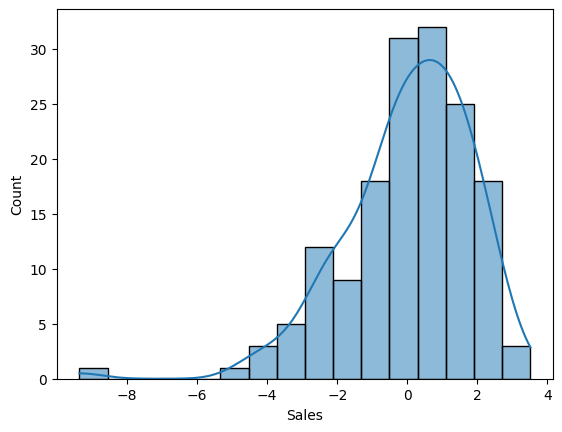

In [45]:
residuals_out = y_test - lr_out.predict(x_test)
sns.histplot(residuals_out, kde=True)

### Regression line without outliers

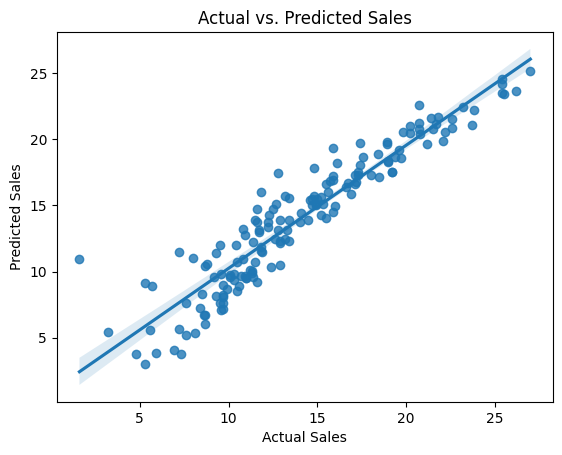

In [48]:
sns.regplot(x=y_test, y=lr_out.predict(x_test))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### Cross validation score without outliers

In [49]:
cv_scores_out = cross_val_score(lr_out, x_out, y_out, cv=5)
print(f'Cross-validation scores: {cv_scores_out}')

Cross-validation scores: [0.87988273 0.9176965  0.92510819 0.80845813 0.89565733]


## Final Report Summary

This project applied **Linear Regression** to predict sales based on advertisement spending across **TV, Radio, and Newspaper** channels.

## Key Insights:
- **TV and Radio ads** are strongly correlated with sales, especially TV.
- **Newspaper ads** show minimal impact on sales.
- **TV** had the highest coefficient when outliers were present, but dropped significantly after removing outliers.
- **Removing outliers** reduced model accuracy and increased error, indicating they were important data points.

## Final Metrics (With Outliers):
- **R² Score:** 0.90
- **MAE:** 0.28
- **Cross-Validation Score (avg):** 0.89

## Conclusion:
Linear Regression performed well, with high accuracy and clear feature importance. **TV and Radio** are the most effective advertising channels for boosting sales. The model is reliable and suitable for business insights.
